# Tarea Semanal #3

[](ConsignaTareaSemanal3.png)

In [4]:
# Módulos que necesitaré
import sympy as sp
import math
from math import log
from IPython.display import display, Math
from generatePoly import generatePoly
import schemdraw
import schemdraw.elements as elm

### Primero obtendremos la plantilla pasabanda normalizada, para ello haremos un poqueño gráfico que nos de idea de qué está ocurriendo:

![](PlantillaPasabanda.png)

Definimos:
- $w_0 = \frac{w_0}{\Omega_w}=1$

Y por tanto sabemos que:
- $\Omega_w = 2\pi \cdot 22KHz $

Además:

- $B = w_2-w_1 \longrightarrow w_2 = B + w_1 \longrightarrow w_1=w_2-B$

De ahí deducimos que:

- ${w_1}^2 + Bw_1 - 1 = 0$

Para resolverlo y ver el potencial de Sympy, lo haremos utilizando está herramienta:

In [5]:
s = sp.symbols('s') # Creamos las variables que usaremos en nuestras funciones.
w_1, B = sp.symbols('w_1 B', positive=True)
H, f, Dem, p, np, result = sp.symbols('H, f, Dem p np result', cls=sp.Function) # Creamos las funciones que usaremos.

solucion = sp.solve(w_1**2 + B*w_1 - 1, w_1)

# Pongo solucion[0] porque pese a ser una única solución (dado que B y w_1 son positivos), sp.solve devuelve un array.
display(Math("w_1 =" + sp.latex(solucion[0])))

<IPython.core.display.Math object>

Como sabemos que $B = \frac{1}{5}$ reemplazamos en la solución:

In [6]:
w_1 = solucion[0].subs({B: 1/5})

display(Math("w_1="+ str(w_1)))

<IPython.core.display.Math object>

Como $w_1 \cdot w_2 = 1$ podemos calcular $w_2$ rápidamente:

In [7]:
w_2 = 1/w_1
display(Math("w_2 = " + str(w_2)))

<IPython.core.display.Math object>

Para calcular $w_{s_1}$ y $w_{s_2}$ sólo tenemos que aplicar la norma $\Omega_w$:

In [8]:
f_s1 = 16 # [KHz] Consigna
f_s2 = 36 # [KHz] Consigna
π = 3.14159265359
Ω_w = 2 * π * 22
#Calculamos w_s1 y w_s2
w_s1 = 2 * π * f_s1
w_s2 = 2 * π * f_s2
# Aplicamos la norma
w_s1 = w_s1 / Ω_w
w_s2 = w_s2 / Ω_w


display(Math("w_{s_1} = \\frac{2\pi \cdot 16KHz}{2\pi \cdot 22KHz} = \\frac{8}{11} = " + str(w_s1) ))
display(Math("w_{s_2} = \\frac{2\pi \cdot 16KHz}{2\pi \cdot 22KHz} = \\frac{8}{11} = " + str(w_s2) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Aplicamos la transf. $PB_a \longrightarrow$ PB
$$\Omega_{s_i} = \frac{Q\left({w_{s_i}}^2 - 1\right)}{w_{s_i}}$$

In [9]:
Q = 5
Ω_s1 = Q * (w_s1**2 - 1) / w_s1 
Ω_s2 = Q * (w_s2**2 - 1) / w_s2

display(Math("\Omega_{s_1} =" + str(Ω_s1) ))
display(Math("\Omega_{s_2} =" + str(Ω_s2) ))

display("¿Nos puede dar negativo? Acá nos damos cuenta de que eso es medio rari, en realidad queremos el módulo, así que:")
Ω_s1 = abs(Ω_s1)
Ω_s2 = abs(Ω_s2)

display(Math("\Omega_{s_1} =" + str(Ω_s1) ))
display(Math("\Omega_{s_2} =" + str(Ω_s2) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'¿Nos puede dar negativo? Acá nos damos cuenta de que eso es medio rari, en realidad queremos el módulo, así que:'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculamos $ϵ$ que es:

$$ϵ = \sqrt{10^{0.1\alpha_{max}} - 1}$$

In [10]:
# No voy a usar la letra epsilon porque se puede confundir con una e a diferencia de pi y Omega
# Así que usaré la letra e que representará a epsilon
α_max = 0.5 # [DB] 
e = sp.sqrt(10**(0.1*α_max) - 1)
display(Math("ϵ =" + str(e) ))

<IPython.core.display.Math object>

Para cada filtro pasabajo calculamos el n y nos quedamos con el que de más grande para estar seguros de que cumplamos las exigencias mínimas del filtro, para calcular n podemos usar la formula mágica que salió del libro o iterar con distintos n y ver que la siguiente regla:

$$ \alpha(w_s) = 10 log\left(1 + \epsilon^2{w_s}^{2n}\right)$$

Esta última forma tiene sentido, es de deducción inmediata y muy conveniente para no tener que memorizar nada, además de ser la preferida del profesor (por todas estas razones). 
Usaremos esta última pero implementada con sympy.

In [11]:
n = 1
n2 = 1
posibleResultado = 0
posibleResultado2 = 0

α_min_1 = 16
α_min_2 = 24
while (α_min_1 > posibleResultado):
    dem = 1 + e**2 * Ω_s1 ** (2 * n)
    posibleResultado = 10 * log(dem,10)
    display(Math( f" n = {n} \Longrightarrow {α_min_1}dB < {math.ceil(posibleResultado)}dB \Longrightarrow {α_min_1 > posibleResultado}" ))
    n = n + 1

n = n - 1

display("Ahora hacemos lo mismo para el otro pasabajos:")

while (α_min_2 > posibleResultado2):
    dem = 1 + e**2 * Ω_s2 ** (2 * n2)
    posibleResultado2 = 10 * log(dem,10)
    display(Math( f" n = {n2} \Longrightarrow {α_min_2}dB < {math.ceil(posibleResultado2)}dB \Longrightarrow {α_min_2 > posibleResultado2}" ))
    n2 = n2 + 1
    
n2 = n2 -1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Ahora hacemos lo mismo para el otro pasabajos:'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora hacemos un chevyshev de orden 3 normalizado, sabiendo que:

$$\left|H(jw)\right|^2 = \frac{1}{1 + \epsilon^2{w_{cn}}^{2}}$$

Para el polinomio de chevyshev aprovecharemos la función de sympy _chebyshevt_ que nos genera un polinomio.

In [12]:
w, B = sp.symbols('w B')
chevy = sp.chebyshevt(n, w)
chevy

4*w**3 - 3*w

Si lo elevamos al cuadrado quedaría:

In [13]:
chevyCuadrado = sp.expand(chevy ** 2)
chevyCuadrado

16*w**6 - 24*w**4 + 9*w**2

Si le multiplicamos un epsilon genérico y le sumamos 1 obtenemos nuestro denominador:
    


In [14]:
e = sp.symbols('ε', positive=True)
dem = sp.expand(1 + chevyCuadrado * e**2)
dem

16*w**6*ε**2 - 24*w**4*ε**2 + 9*w**2*ε**2 + 1

Sabemos además que:
 

$$\left|H(jw)\right|^2_{s = \frac{j}{w}} = H(s)\cdot H(− s) = \frac{1}{a_3s^3 + a_2s^2 + a_1s + a_0} \cdot \frac{1}{-a_3s^3 + a_2s^2 - a_1s + a_0}$$

Igualando nuestros polinomios para $\epsilon = 0.35$ nos queda:

In [15]:
s = sp.symbols('s')

# generatePoly te genera un ponimio genérico de orden n, la función la cree yo.
p2, symbols = generatePoly(3)
np2 = sp.poly(p2.subs({s:-s}))

# Mostramos en LaTeX los polinomios:
display(Math((sp.latex(p2)))) 
display(Math((sp.latex(np2))))

## Multiplicamos ambos polinomios y mostramos
result = sp.poly(p2 * np2, s)
display(Math((sp.latex(result))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:

## Hago que dem sea del tipo Poly y pongo su epsilon ya con valor:
dem = sp.poly(dem, w, e)
c = sp.sqrt(10**(0.1*α_max) - 1)
#dem = dem.subs({ε:2})
demFinal = dem.subs({e:c})
#Reemplazo además w por w = s/j
display(Math(sp.latex(demFinal)))

i = sp.sqrt(-1)

demFinalS = demFinal.subs({ w: s/sp.I })
demFinalS = sp.poly(demFinalS, s)
display(Math(sp.latex(demFinalS)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:

def coefArray (poly, dem):
    result = []
    n = sp.degree(dem)
    for i in range(n+1):
        polyCoeff = poly.coeff_monomial(s**i)
        demCoeff = dem.coeff_monomial(s**i)
        equation = polyCoeff - demCoeff
        if( equation  != 0):
            result.append(equation)
    return result

coefarray = coefArray(result, demFinalS) # Calculo los coeficientes

## Todo lo demás es sólo con fines de mostrar las ecuaciones de una forma cómoda y linda, no de importancia porque uso estructuras complejas.
symbolsFormatted = {symbol: "{" + sp.latex(symbol) + "}" for symbol in symbols}
equations = [f"Equation  \hspace{{0.2cm}} {i}:" + sp.latex(equation, symbol_names=symbolsFormatted) for i, equation in enumerate(coefarray) if equation is not None]
Math("\\\\\n".join(equations))


<IPython.core.display.Math object>

Como este sistema de ecuaciones es bastante difícil, pese a que podemos usar simpy.solve o simpy.nonLinearSolve, tardará mucho.
En vez de hacer eso, calcularemos las raices de nuestro polinomio de antemano:



In [18]:
raices = sp.roots(demFinalS, multiple=True)
for raiz in raices:
    display(Math(sp.latex(raiz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sólo nos preocupan aquellas donde la parte real es menor que 0 para obtener $H(s)$, las obtenemos y multiplicamos es decir:

In [19]:
poly = []
for raiz in raices:
    if (sp.re(raiz) < 0):
        poly.append(s - sp.N(raiz,6))
        display(Math(sp.latex(raiz)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Para armar nuestras $SOS$ vamos a hacer dos polinomios, uno con las complejas conjugadas y una con la raiz real, quedando:

    

In [20]:
SOS1 = sp.poly(poly[1] * poly[2])
SOS2 = sp.poly(poly[0])

display(Math(sp.latex(SOS1)))
display(Math(sp.latex(SOS2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Finalmente nuestra transferencia será:

In [21]:
w_0 = SOS1.EC()
w_1 = SOS2.EC()
H = sp.Mul(w_1/SOS2,w_0/SOS1, evaluate=False)
display(Math("H(s) =" + sp.latex(H)))

<IPython.core.display.Math object>

Aplicamos el nucleo de transformación:
$$s=Q\cdot\frac{s^2+1}{s}$$

En realidad... 
$$s=Q\cdot\frac{s^2+w_{0_{pasabanda}}}{s}$$


In [22]:
Q = sp.symbols('Q')
B_1 = w_0/SOS1
B_2 = w_1/SOS2

B_1_pasabanda = sp.simplify(B_1.subs({s:Q*(s**2+1)/s}))
B_2_pasabanda = sp.simplify(B_2.subs({s:Q*(s**2+1)/s}))


H_2 = sp.Mul( B_2_pasabanda,B_1_pasabanda, evaluate=False)
H_2


(0.626456*s/(1.0*Q*(s**2 + 1) + 0.626456*s))*(1.14245*s**2/(Q**2*(s**2 + 1)**2 + 0.626456*Q*s*(s**2 + 1) + 1.14245*s**2))

Como Q = 5 si reemplzaamos:

In [23]:
B_1_pasabanda_Q = sp.simplify(B_1_pasabanda.subs({Q:5}))
B_2_pasabanda_Q = sp.simplify(B_2_pasabanda.subs({Q:5}))

H_2 = sp.Mul( B_2_pasabanda_Q,B_1_pasabanda_Q, evaluate=False)
H_2

(0.626456*s/(5.0*s**2 + 0.626456*s + 5.0))*(1.14245*s**2/(25.0*s**4 + 3.13228*s**3 + 51.1424*s**2 + 3.13228*s + 25.0))

Divido por el termino independiente arriba y abaajo para obtener $H(s)$ en su forma mónica

In [24]:
n,d = sp.fraction(B_1_pasabanda_Q)
n2,d2 = sp.fraction(B_2_pasabanda_Q)

w_0 = sp.poly(d).EC()
w_1 = sp.poly(d2).EC()

SOS1 = sp.Mul( n/w_0 , 1/(d/w_0), evaluate=False)
SOS2 = sp.Mul( n2/w_1 , 1/(d2/w_1), evaluate=False)

display(Math("H(s)=" + sp.latex(SOS1) +"\cdot" + sp.latex(SOS2)))

H = sp.expand(SOS1 * SOS2)


<IPython.core.display.Math object>

Para implementarlo hacemos 3 SOS de orden 2:

In [25]:
H = sp.expand(SOS1 * SOS2)
H

0.00572555*s**3/(1.0*s**6 + 0.250583*s**5 + 3.0614*s**4 + 0.506891*s**3 + 3.0614*s**2 + 0.250583*s + 1.0)

In [26]:
s = sp.symbols('s')
n,d = sp.fraction(H)
dem = sp.poly(d)
raices = sp.roots(dem, multiple=True)

poly1 = sp.poly( (s - raices[0]) * (s - raices[1]) )
poly2 = sp.poly( (s - raices[2]) * (s - raices[3]) )
poly3 = sp.poly( (s - raices[4]) * (s - raices[5]) )

w_0 = poly1.coeff_monomial(s)
w_1 = poly2.coeff_monomial(s)
w_2 = poly3.coeff_monomial(s)

cutePoly1 = sp.N(w_0*s/poly1,3)
cutePoly2 = sp.N(w_1*s/poly2,3)
cutePoly3 = sp.N(w_2*s/poly3,3)

display(Math("H(s) = K \cdot" + sp.latex(cutePoly1) + sp.latex(cutePoly2) + sp.latex(cutePoly3)))

<IPython.core.display.Math object>

Como $0.13 \cdot 0.0069 \cdot 0.056$ no llega a ser 0.0057, necesitamos el coeficiente K para llegar a esa ganancia:

In [27]:
n,d = sp.fraction(H)
# Obtengo el numerador y le saco el s^3
n = n / s**3
# K es igual al numerador sobre la ganancia.
K = n / (w_0*w_1*w_2)
K
display(Math("K = \\frac{" + sp.latex(n)+ "}" + "{" + sp.latex(w_0*w_1*w_2) + "} =" + sp.latex(K)+ " \\ veces" ))

<IPython.core.display.Math object>

In [28]:
display(Math(f"H(s) = {sp.N(K,5)} \cdot" + sp.latex(cutePoly1) + sp.latex(cutePoly2) + sp.latex(cutePoly3)))

<IPython.core.display.Math object>

Para implementar el filtro voy a usar un resistor con un capacitor e inductor en paralelo, como vimos en clase. Me género un poco de dudas por qué ése circuito en específico, así que consulte a mis compañeros y logré entender que era bastante conveniente. 

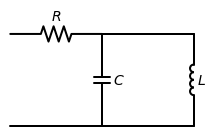

In [29]:
d = schemdraw.Drawing()
R1 = d.add(elm.Resistor().label('$R$'))
C1 = d.add(elm.Capacitor().down().label('$C$', loc='bottom'))
d += elm.Line().right()
R1 = d.add(elm.Inductor().up().label('$L$', loc='bottom'))
d.add(elm.Line().left())
line = d.add(elm.Line().left().at(C1.end))
d.draw()

La transferencia de este circuito en su forma mónica se puede demostrar fácilmente que es:

$$H(s) = \frac{\frac{Z_1 \cdot Z_2}{Z_1+Z_2}}{Z_0 + \frac{Z_1 \cdot Z_2}{Z_1+Z_2}}$$

~Vamos a usar sympy para calcularla, así luego si tenemos otro circuito similar, por ejemplo TP2 EJ1, podemos calcularla automáticamente sólo cambiando las Z.~ Dada la falta de tiempo sólo vamos a dar el resultado:

$$H(S)= \frac{\frac{S}{CR}}{S^2+\frac{S}{CR}+\frac{1}{LC}}$$

C aparece en los 3 componentes, es un grado de libertad extra que no necesito en este caso, así que lo desaparezco diciendo:

$$ C = 1F$$

$$H(S)= \frac{\frac{S}{R}}{S^2+\frac{S}{R}+\frac{1}{L}}$$

De esa forma vemos rápidamente que:

In [30]:
display(  Math( "SOS_1 = " +sp.latex(cutePoly1)))

<IPython.core.display.Math object>

$$L = 1Hy$$
$$R = \frac{1}{0.125\Omega}$$
$$R = 8\Omega$$

In [31]:
display(  Math( "SOS_2 = " +sp.latex(cutePoly2)))

<IPython.core.display.Math object>

$$L = \frac{1}{1.23Hy}$$
$$L = 0.813Hy$$
$$R = \frac{1}{0.069\Omega}$$
$$R = 14.492\Omega$$

In [32]:
display(  Math( "SOS_3 = " +sp.latex(cutePoly3)))

<IPython.core.display.Math object>

$$L = \frac{1}{0.813Hy}$$
$$L = 1.23Hy$$
$$R = \frac{1}{0.0563\Omega}$$
$$R = 17.762\Omega$$

![](./Simulaciones/Netlist.png)

![](./Simulaciones/TareaSemanal3Grafico.jpg)

Cabe destacar que falta contemplar la ganancia de 11.766 de la que hablaba anteriormente para que el gráfico llegue a 0dB, es por eso que esta a -22dB. Se puede arreglar añadiendo un amplificador más con una resistencia a la salida.

Todo muy lindo pero ahora tenemos que desnormalizar los valores con la norma que usamos en un principio:
- $$\Omega_w = 2\pi \cdot 22KHz $$
Además tenemos que desnormalizar también por una norma de impedancia, que decido:
- $$\Omega_z = 1K\Omega $$



In [33]:
# La d es de desnormalizado
Ω_w = 2 * 3.1415 * (22*10**3)
Ω_z = 1 * (10 **3)

# Inductores
L1 = 1
L2 = 0.813
L3 = 1.23

# Resistencias
R1 = 8
R2 = 14.492
R3 = 17.762

# Los capacitores son todos iguales
C = 1
Cd = C/(Ω_w*Ω_z)

# Inductores
Ld1 = L1 * (Ω_z / Ω_w)
Ld2 = L2 * (Ω_z / Ω_w)
Ld3 = L3 * (Ω_z / Ω_w)

# Resistencia
Rd1 = R1 * Ω_z
Rd2 = R2 * Ω_z
Rd3 = R3 * Ω_z

display(Math(f" R_1={Rd1}\\Omega ; R_2={Rd2}\\Omega ; R_3={Rd3}\\Omega"))
display(Math(f" L_1={Ld1}Hy ; L_2={Ld2}Hy ; L_3={Ld3}Hy"))
display(Math(f" C={Cd}F"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

![](./Simulaciones/desnormalizado.png)

Para activarlo con la celda activa, es tan simple como cambiar cada inductor por la celda correspondiente. Aunque poner eso en el LTSpice es bastante difícil y no estoy seguro de cuál tiene que ser el valor de los componentes para conseguir obtener el valor del inductor deseado. Según entiendo en esa celda:

$$L = C \cdot R^2$$

Pero cuando probe reemplazar el primer inductor por la celda de la siguiente forma:

![](./Simulaciones/Circuito1.png)

Obtuve que la transferencia se modificó un poco, estoy pensando que puede tener relación con la ganancia de la celda

![](./Simulaciones/Grafico1.png)

Hice el circuito normalizado y obtuve lo que esperaba:

<img src="./Simulaciones/Circuito2.png"/>
<img src="./Simulaciones/Grafico2.png"/>


Eso da pie a que desnormalicé mal los valores, voy a revisar eso.

Finalmente 18:30 conseguí la transferencia que esperaba y era sólo que había calculado mal los valores al desnormalizar, quedaría así el circuito:

<img src="./Simulaciones/Circuito3.png"/>



Sabiendo que cada bloque de transferencia nos da 2 de ganancia, los 3 bloques darían 8 de ganancia, nos quedaría 1.47 de ganancia faltante, debatiendo con César e Israel, en vez de andar toqueteando los valores del "inductor" que es complejo y complicado, decido amplifiar con una resistencia y un amplificador, además quitamos los inductores innecesarios tomando la salida de U3 U5 y U7, finalmente queda el circuito: 

<img src="./Simulaciones/CircuitoFinal.png"/>

<img src="./Simulaciones/TransferenciaFinal.png"/>

